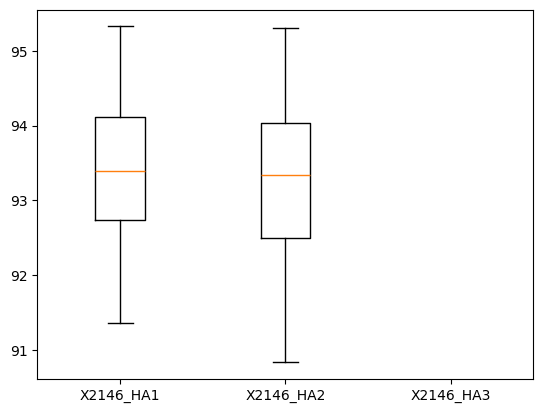

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pptx import Presentation
from pptx.util import Inches


column1 = 'DATA_FILENAME'
column2 = 'LT4_FOS_1000NITS_W511_10HZ WU GLumUniformity'

df = pd.read_csv(".\\merged data.csv", index_col=None, 
                sep=',', header=0, 
                usecols=None, skiprows=None)

# Remove duplicated rows
df = df.drop_duplicates()
# Merging data frames into one frame

df_plot = df[[column1, column2]]
df_plot_groups = df_plot.groupby(column1, sort=None)

# Prepare data
plot_data_labels = []
plot_data_array = []

for groupname, groupdata in df_plot_groups:
    plot_data_labels.append(groupname)
    plot_data_array.append((groupdata[column2]).to_numpy(dtype='float'))


plt.boxplot(x=plot_data_array, labels=plot_data_labels)
plt.savefig('boxplot.png', transparent=True)
plt.show()

# Open the PPT
ppt_output = Presentation('Template_Report.pptx')

# Select the slide to be editted
slide = ppt_output.slides[0]

# Remove the old figures
shapes = slide.shapes
for shape in shapes:
    #print(shape.shape_type)
    if shape.shape_type == 13: # 13 = PICTURE
        shapes.element.remove(shape.element)

# Add the new figures
plot_img_path = 'boxplot.png'
plot_img = slide.shapes.add_picture(plot_img_path, Inches(0.40), Inches(4.85), width=Inches(5.30))

# Send the figures to the back
ref_element = slide.shapes[0]._element
ref_element.addprevious(plot_img._element)

# Save the PPT
ppt_output.save('Template_Report_new.pptx')



def df_to_list_array(
    dataframe: pd.DataFrame,
    groupby_columnname: str,
    getdata_columnname: str
):

    pass


